In [1]:
# Получение данных
with open('хозяин и работник.txt', 'r') as f:
  X = f.read()

X

'    Лев Николаевич Толстой. Хозяин и работник\n\n\n      \n      \n      \n           ------------------------------------------------------:)\n           Книга: Л.Н.Толстой "Воскресение". Роман; Рассказы\n           Издательство "Художественная литература", Москва, 1984\n           OCR & SpellCheck: Zmiy (zpdd@chat.ru), 4 октября 2001\n           ------------------------------------------------------:)\n      \n      \n      \n\n        I\n\n\n      \n           Это было в  семидесятых годах,  на другой день после зимнего Николы.  В\n      приходе был праздник,  и деревенскому дворнику, купцу второй гильдии Василию\n      Андреичу Брехунову,  нельзя было отлучиться:  надо было быть в церкви,  - он\n      был  церковный староста,  -  и  дома  надо было принять и  угостить родных и\n      знакомых.  Но вот последние гости уехали,  и Василий Андреич стал собираться\n      тотчас  же  ехать  к  соседнему  помещику  для  покупки  у  него  давно  уже\n      приторговываемой рощи.  Василий 

In [2]:
# Нормализуем текст
import nltk
import re

X = re.sub(r'\t+|\n+', ' ', X)
nltk.download('punkt')
X  = re.sub(r'[\'\"]', '', X)
X = nltk.tokenize.sent_tokenize(X)
print(len(X))
X

1080


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['    Лев Николаевич Толстой.',
 'Хозяин и работник                                 ------------------------------------------------------:)            Книга: Л.Н.Толстой Воскресение.',
 'Роман; Рассказы            Издательство Художественная литература, Москва, 1984            OCR & SpellCheck: Zmiy (zpdd@chat.ru), 4 октября 2001            ------------------------------------------------------:)                              I                   Это было в  семидесятых годах,  на другой день после зимнего Николы.',
 'В       приходе был праздник,  и деревенскому дворнику, купцу второй гильдии Василию       Андреичу Брехунову,  нельзя было отлучиться:  надо было быть в церкви,  - он       был  церковный староста,  -  и  дома  надо было принять и  угостить родных и       знакомых.',
 'Но вот последние гости уехали,  и Василий Андреич стал собираться       тотчас  же  ехать  к  соседнему  помещику  для  покупки  у  него  давно  уже       приторговываемой рощи.',
 'Василий  Андреич  торопи

In [3]:
# Векторизация
nltk.download('stopwords')
from nltk.corpus import stopwords
!python -m spacy download ru_core_news_md
import spacy
nlp = spacy.load('ru_core_news_md')
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def tokenizer(sent):
  return [token.lemma_ for token in nlp(sent) if token.is_alpha]

stop_words = stopwords.words('russian')
vectorizer = CountVectorizer(binary=True,
                             stop_words = stop_words,
                             tokenizer = tokenizer)
data = vectorizer.fit_transform(X)
data = pd.DataFrame(data.todense(),
                    columns=vectorizer.get_feature_names_out())
data.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2022-11-13 17:23:56.081283: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.9 MB 118 kB/s 
     |████████████████████████████████| 55 kB 1.7 MB/s 
     |████████████████████████████████| 8.2 MB 13.7 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=3f12cbba746de47cc21345f92e13be0b99fd5f1a255d49badc2365761aea8e94
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['весь', 'мочь', 'ничто', 'свой', 'хороший', 'это'] not in stop_words.
  % sorted(inconsistent)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Columns: 2977 entries, a to ящик
dtypes: int64(2977)
memory usage: 24.5 MB


In [4]:
# Примерка модели агломерации
from sklearn.cluster import FeatureAgglomeration

model = FeatureAgglomeration(n_clusters = None, distance_threshold = 0.1)
model.fit(data)
max_dist = max(model.distances_)

# максимальные расстояния между точками
max_dist

26.193160059972477

In [5]:
# Поиск
import numpy as np

dims = []
step = max_dist/50
for i in np.arange(step, max_dist, step):
  model = FeatureAgglomeration(n_clusters = None, distance_threshold = i)
  clusters = model.fit_transform(data)
  dims.append({'param': round(i, 3),
               'dim': clusters.shape[1]})
  
dims[:5]

[{'param': 0.524, 'dim': 1789},
 {'param': 1.048, 'dim': 1668},
 {'param': 1.572, 'dim': 1198},
 {'param': 2.095, 'dim': 896},
 {'param': 2.619, 'dim': 667}]

In [6]:
# Вычисление различий
last = len(dims) - 1
dims[last]['diff'] = 0
for i, dim in enumerate(dims):
  if i == last:
    break
  dim['diff'] = dim['dim'] - dims[i+1]['dim']
dims[:5]

[{'param': 0.524, 'dim': 1789, 'diff': 121},
 {'param': 1.048, 'dim': 1668, 'diff': 470},
 {'param': 1.572, 'dim': 1198, 'diff': 302},
 {'param': 2.095, 'dim': 896, 'diff': 229},
 {'param': 2.619, 'dim': 667, 'diff': 196}]

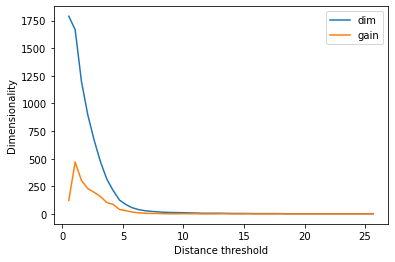

In [7]:
# Визуализация
from matplotlib import pyplot as plt

param_list = [x['param'] for x in dims]
dim_list = [x['dim'] for x in dims]
diff_list = [x['diff'] for x in dims]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Dimensionality')
ax.set_xlabel('Distance threshold')
plt.plot(param_list, dim_list, label='dim')
plt.plot(param_list, diff_list, label='gain')
ax.legend()
plt.show()

In [8]:
# Получение оптимального среза
dims_sorted = sorted(dims, key=lambda x: x['diff'], reverse=True)
threshold = dims_sorted[0]['param']

model = FeatureAgglomeration(n_clusters = None,
                             distance_threshold = threshold,
                             pooling_func = np.min)
data_clustered = model.fit_transform(data)
data_clustered = pd.DataFrame(data_clustered)
labels = model.labels_

data_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Columns: 1668 entries, 0 to 1667
dtypes: int64(1668)
memory usage: 13.7 MB


In [9]:
# Получение наборов элементов
from mlxtend.frequent_patterns import apriori

min_support = 2/len(data)
itemsets = apriori(data_clustered,
                   min_support = min_support,
                   max_len = 2)
itemsets

,support,itemsets
0,0.001852,(0)
1,0.001852,(1)
2,0.001852,(2)
3,0.001852,(4)
4,0.001852,(6)
...,...,...
3985,0.002778,"(1663, 1615)"
3986,0.001852,"(1624, 1631)"
3987,0.003704,"(1624, 1663)"
3988,0.001852,"(1635, 1663)"


In [10]:
# Поиск
from mlxtend.frequent_patterns import association_rules

rules = association_rules(itemsets, min_threshold = min_support)
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0])
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0])

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,903,0.001852,0.030556,0.001852,1.000000,32.727273,0.001795,inf
1,903,0,0.030556,0.001852,0.001852,0.060606,32.727273,0.001795,1.062545
2,0,1131,0.001852,0.004630,0.001852,1.000000,216.000000,0.001843,inf
3,1131,0,0.004630,0.001852,0.001852,0.400000,216.000000,0.001843,1.663580
4,0,1395,0.001852,0.008333,0.001852,1.000000,120.000000,0.001836,inf
...,...,...,...,...,...,...,...,...,...
6029,1663,1624,0.055556,0.019444,0.003704,0.066667,3.428571,0.002623,1.050595
6030,1635,1663,0.007407,0.055556,0.001852,0.250000,4.500000,0.001440,1.259259
6031,1663,1635,0.055556,0.007407,0.001852,0.033333,4.500000,0.001440,1.026820
6032,1662,1663,0.003704,0.055556,0.001852,0.500000,9.000000,0.001646,1.888889


3.3 Searching for inclusions

In [11]:
# Поиск включений
incls = rules[rules['confidence'] == 1]
incls = incls[['antecedents', 'consequents']]
# токен-antecedent = токен-consequent || !токен-antecedent = !токен-consequent

incls

,antecedents,consequents
0,0,903
2,0,1131
4,0,1395
6,0,1663
8,1,425
...,...,...
5997,1551,1663
6009,1583,1663
6010,1589,1663
6013,1591,1663


In [12]:
# Создание онтологии
!pip install Cython
!pip install owlready2
from owlready2 import *
import types

onto = get_ontology('http://onto.owl')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.5 MB 3.9 MB/s 
  Created wheel for owlready2: filename=Owlready2-0.39-cp37-cp37m-linux_x86_64.whl size=22132053 sha256=ee179024c2ee059eefd2396a23398b38cf0e88ed2ac1bd4e6b1d1aef24409cf1
  Stored in directory: /root/.cache/pip/wheels/c9/5b/fc/da1e42a17f22cd62bfb170f847a3fb541a7f628858ad3595ec
Successfully built owlready2


In [13]:
# Создание отдельных лиц для предложений
with onto:
  onto_sent = types.new_class('Sentence', (Thing,))
  types.new_class('hasText', (DataProperty, FunctionalProperty))
  for i, sent in enumerate(X):
    sent_inst = onto_sent(f'sentence_{i}')
    sent_inst.hasText = sent
    
onto.save('onto.owl')

In [14]:
# Создание классов для токенов
with onto:
  onto_token = types.new_class('Token', (Thing,))
  for i, token in enumerate(data.columns):
    token_inst = onto_token(f'token_{i}')
    token_inst.label = token

onto.save('onto.owl')

In [15]:
# Связывание предложений с помощью лексем
with onto:
  hasToken = types.new_class('hasToken', (ObjectProperty,))
  for i, row in data.iterrows():
    sent_inst = onto[f'sentence_{i}']
    for j, token in enumerate(data.columns):
      if row[token] == 1:
        token_inst = onto[f'token_{j}']
        sent_inst.hasToken.append(token_inst)

onto.save('onto.owl')

In [16]:
# Создание кластеров
with onto:
  onto_clust = types.new_class('Cluster', (Thing,))
  for label in set(labels):
    clust_cl = types.new_class(f'Cluster_{label}', (onto_clust,))

onto.save('onto.owl')

In [17]:
# Связывание кластеров с токенами
with onto:
  for i, label in enumerate(labels):
    clust_cl = onto[f'Cluster_{label}']
    token_inst = onto[f'token_{i}']
    clust_cl.equivalent_to.append(hasToken.value(token_inst))
onto.save('onto.owl')

In [18]:
# Установка включений
with onto:
  for index, row in incls.iterrows():
    ant = row['antecedents']
    con = row['consequents']
    ant_cl = onto[f'Cluster_{ant}']
    con_cl = onto[f'Cluster_{con}']
    reverse = incls[(incls['antecedents'] == con) & (incls['consequents'] == ant)]
    if reverse.empty:
      ant_cl.is_a.append(con_cl)
    else:
      ant_cl.equivalent_to.append(con_cl)
      
onto.save('onto.owl')

In [20]:
with onto:
  sync_reasoner_pellet()

onto.save('onto_reasoned.owl', format='ntriples')

* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /usr/local/lib/python3.7/dist-packages/owlready2/pellet/antlr-3.2.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/antlr-runtime-3.2.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/log4j-1.2.16.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/xml-apis-1.4.01.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jgrapht-jdk1.5.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/commons-codec-1.6.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/pellet-2.3.1.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/aterm-java-1.6.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/httpcore-4.2.2.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jena-arq-2.10.0.jar:/usr/local/lib/python3.7/dist-packa